<div style="direction:rtl"> به نام خدا </div>
<div style="direction:rtl"> نام : علیرضا آقایی </div>
<div style="direction:rtl"> شماره دانشجویی : 810197679</div>
<div style="direction:rtl"> گزارش کار تمرین کامپیوتری ۰ </div>
<br></br>
<div style="direction:rtl"> هدف پروژه: </div>
<div style="direction:rtl"> پرکردن نواقص یک دیتاست با پیشبینی آنها به کمک تحلیل آماری </div>
<br></br>
<div style="direction:rtl"> صورت پروژه : </div>
<div style="direction:rtl"> با استفاده از اطلاعات داده شده در فایل car_price_dataset.csv در مورد خودرو هایی که در آمریکا به فروش می‌رسند، ابتدا تعدادی از اطلاعات آماری که می‌توان با استفاده از اطلاعات داده شده به دست آورد را به دست آورید. سپس در نهایت با جایگزینی خانه های خالی با مقدار مناسب، تقریبی خطی برای به دست آوردن قیمت خودرو ها بر اساس یکی از ویژگی های آن به دست آورید که میزان خطای آن کمتر از 0.5 باشد. نمودار های مربوط به آن ها را نیز رسم کنید. کتاب خانه های مورد نیاز نیز pandas، numpy و matplotlib می‌باشد. </div>


In [33]:
import time
import pandas
import matplotlib.pyplot

<div style="direction:rtl"> ۱- در این بخش ابتدا داده ها را از فایل csv داده شده در پروژه، می‌خوانیم: </div>

In [34]:
df = pandas.read_csv('car_price_dataset.csv' , sep = ',')

<div style="direction:rtl"> حال با استفاده از تابع describe اطلاعات آماری زیر را به دست می‌آوریم: </div>
<div style="direction:rtl"> count : تعداد خانه های دارای مقدار در یک ستون </div>
<div style="direction:rtl"> mean : میانگین داده های یک ستون </div>
<div style="direction:rtl"> std : انحراف معیار داده های یک ستون </div>
<div style="direction:rtl"> min : کمترین مقدار داخل داده های یک ستون </div>
<div style="direction:rtl"> 25% , 50% , 75% : اطلاعاتی در مورد چارک ها  </div>
<div style="direction:rtl"> max : بیشترین مقدار داخل داده های یک ستون </div>

In [35]:
df.describe()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


<div style="direction:rtl"> ۵ دیتای اول را با استفاده از تابع head نشان می‌دهیم: </div>

In [36]:
df.head()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.0
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN


<div style="direction:rtl"> ۵ دیتای آخر را با استفاده از تابع tail نشان می‌دهیم: </div>

In [37]:
df.tail()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


<div style="direction:rtl"> ۲- نوع هر کدام از ستون های داده را با استفاده از تابع info نشان می‌دهیم: </div>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    object 
 3   carlength       205 non-null    float64
 4   carwidth        205 non-null    float64
 5   carheight       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    object 
 8   enginesize      191 non-null    float64
 9   horsepower      182 non-null    float64
 10  citympg         205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           185 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 20.9+ KB


<div style="direction:rtl"> با استفاده از تابع replace مقدایر داخل ستون fueltype را برچسب گذاری میکنیم: (gas = 0 , diesel = 1)
 </div>

In [39]:
df['fueltype'].replace({'gas' : 0 , 'diesel' : 1} , inplace = True)
df['fueltype']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    1
204    0
Name: fueltype, Length: 205, dtype: int64

<div style="direction:rtl"> ۳-
ابتدا خانه‌هایی که مقدار آن‌ها برابر با Nan است را با استفاده از تابع isna می‌یابیم. سپس با استفاده از تابع sum تعداد آن‌ها را در هر ستون به دست می‌آوریم: </div>

In [40]:
df.isna().sum()

car_ID             0
CarName            0
fueltype           0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize        14
horsepower        23
citympg            0
highwaympg         0
price             20
dtype: int64

<div style="direction:rtl"> مقادیر Nan داخل ستون ها را ( به جز ستون price ) را با میانگین آن ستون جایگزین می‌کنیم:
 </div>

In [41]:
df.loc[: , df.columns != 'price'] = df.loc[: , df.columns != 'price'].fillna(df.mean())
df

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,four,130.0,111.000000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,six,152.0,154.000000,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,four,109.0,105.747253,24,30,13950.0
4,5,audi 100ls,0,176.6,66.4,54.3,2824,five,136.0,115.000000,18,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,four,141.0,114.000000,23,28,16845.0
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,four,141.0,160.000000,19,25,19045.0
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,six,173.0,134.000000,18,23,21485.0
203,204,volvo 246,1,188.8,68.9,55.5,3217,six,145.0,106.000000,26,27,22470.0


<div style="direction:rtl"> مزایا و معایب جایگزین کردن مقدار سلول های خالی  با مقدار میانگین ستون: </div>
<div style="direction:rtl"> معایب: </div>
<div style="direction:rtl"> ۱- در این روش به correlation میان ویژگی ها توجه نمی‌شود. </div>
<div style="direction:rtl"> ۲- این روش باعث کاهش واریانس داده ها می‌شود. </div>
<div style="direction:rtl"> مزایا: </div>
<div style="direction:rtl"> ۱- با توجه به این که این روش تمام مقادیر خالی را جایگزین می‌کند، بنابراین می‌توانیم از کل database استفاده کرد. </div>
<div style="direction:rtl"> ۲- روشی قابل قهم به همراه پیاده سازی ساده </div>

<div style="direction:rtl">سطر هایی که مقدار ستون price در آن‌ها برابر با NaN است را جدا کرده و در new_df ذخیره می‌کنیم:
 </div>

In [42]:
new_df = df.loc[df.price.isna() == True]
df = df.loc[df.price.isna() == False]
new_df

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,five,136.000000,115.0,18,22,NaN
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,four,156.000000,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,four,92.000000,76.0,31,38,NaN
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,four,91.000000,68.0,31,38,NaN
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,four,91.000000,68.0,31,38,NaN
59,60,mazda 626,0,177.8,66.5,53.7,2385,four,122.000000,84.0,26,32,NaN
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,four,122.000000,84.0,26,32,NaN
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,five,183.000000,123.0,22,25,NaN
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,four,92.000000,68.0,31,38,NaN
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,four,156.000000,145.0,19,24,NaN


<div style="direction:rtl"> ۴-
تعداد خودرو‌ها به ازای تعداد سیلندر ( با استفاده از تابع value_counts): </div>

In [43]:
df.value_counts(['cylindernumber'])

cylindernumber
four              143
six                22
five                9
eight               5
two                 4
twelve              1
three               1
dtype: int64

<div style="direction:rtl"> ۵-
تعداد خودروهای بنزینی که قدرت اسب بخار بیش از ۱۰۰ دارند و مایل بر گالن آن‌ها در شهر کمتر از ۱۵ است: </div>

In [44]:
df[(df.fueltype == 0) & (df.horsepower > 100) & (df.citympg < 15)].shape[0]

3

<div style="direction:rtl"> ۶-
میانگین قیمت خودروهای بنزینی و گازویلی به صورت vectorization ( با استفاده از تابع groupby ) : </div>
<div style="direction:rtl"> gas = 0 , diesel = 1 </div>

In [45]:
df.groupby('fueltype').price.mean()

fueltype
0    13170.738958
1    15326.894737
Name: price, dtype: float64

<div style="direction:rtl"> ۷-
میانگین قیمت خودروهای بنزینی و گازویلی بدون استفاده از vectorization:( با استفاده از حلقه for و iterate کردن روی سطر های dataframe) </div>

In [46]:
import math
sum_gas = 0
cnt_gas = 0
sum_dis = 0
cnt_dis = 0

start_it = time.time()

for index, row in df.iterrows():
    if row['fueltype'] == 0 and math.isnan(row['price']) == False:
        cnt_gas += 1
        sum_gas += row['price']
    elif row['fueltype'] == 1 and math.isnan(row['price']) == False:
        cnt_dis += 1
        sum_dis += row['price']
print('gas Mean = ' + str(sum_gas / cnt_gas))
print('diesel Mean = ' +  str(sum_dis / cnt_dis))

end_it = time.time()

gas Mean = 13170.738957831325
diesel Mean = 15326.894736842105


<div style="direction:rtl"> زمان اجرای دو حالت برنامه (با استفاده از vectorization و بدون استفاده از آن):
 </div>
 
<div style="direction:rtl"> زمان اجرای کد با استفاده از vectorization سریع تر از حالت استفاده از حلقه for است. </div>

In [47]:
start_panda = time.time()
df.groupby('fueltype').price.mean()
end_panda = time.time()

print('Vectorization Time = ' , end_panda - start_panda)
print('Loop Time = ' , end_it - start_it)

Vectorization Time =  0.0016460418701171875
Loop Time =  0.03456377983093262


<div style="direction:rtl"> ۸-
نمودار توزیع (histogram) هر ستون از داده: </div>
<div style="direction:rtl"> *نمودارها با اسفاده از کتاب خانه matplotlib کشیده شده‌اند. </div>

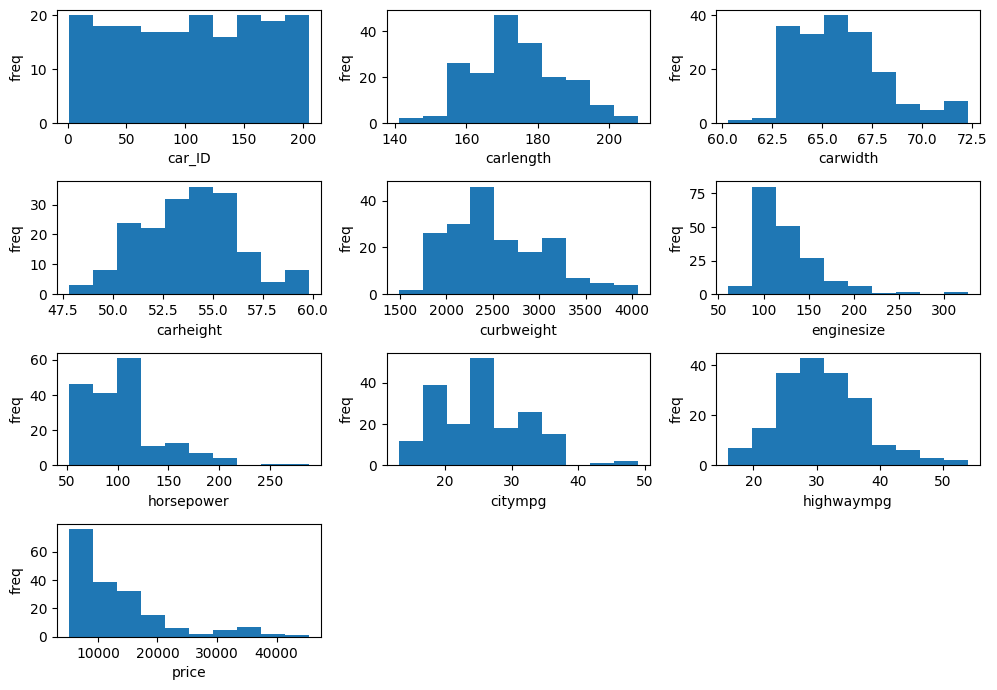

In [48]:
matplotlib.pyplot.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')

matplotlib.pyplot.subplot(4 , 3 , 1)
matplotlib.pyplot.xlabel('car_ID')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['car_ID'])


matplotlib.pyplot.subplot(4 , 3 , 2)
matplotlib.pyplot.xlabel('carlength')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['carlength'])

matplotlib.pyplot.subplot(4 , 3 , 3)
matplotlib.pyplot.xlabel('carwidth')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['carwidth'])

matplotlib.pyplot.subplot(4 , 3 , 4)
matplotlib.pyplot.xlabel('carheight')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['carheight'])

matplotlib.pyplot.subplot(4 , 3 , 5)
matplotlib.pyplot.xlabel('curbweight')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['curbweight'])

matplotlib.pyplot.subplot(4 , 3 , 6)
matplotlib.pyplot.xlabel('enginesize')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['enginesize'])

matplotlib.pyplot.subplot(4 , 3 , 7)
matplotlib.pyplot.xlabel('horsepower')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['horsepower'])

matplotlib.pyplot.subplot(4 , 3 , 8)
matplotlib.pyplot.xlabel('citympg')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['citympg'])

matplotlib.pyplot.subplot(4 , 3 , 9)
matplotlib.pyplot.xlabel('highwaympg')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['highwaympg'])

matplotlib.pyplot.subplot(4 , 3 , 10)
matplotlib.pyplot.xlabel('price')
matplotlib.pyplot.ylabel('freq')
matplotlib.pyplot.hist(df['price'])

matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()

<div style="direction:rtl"> ۹-
حذف ستون های غیر عددی و نرمال سازی ستون مربوط به price: </div>

In [49]:
calc_df = df[['car_ID' , 'carlength' , 'carwidth' , 'carheight' , 'curbweight' , 'enginesize' , 'horsepower' , 'citympg' , 'highwaympg' , 'price']]
calc_df = calc_df.assign(price = (calc_df['price'] - calc_df['price'].mean()) / calc_df['price'].std())
calc_df

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,1,168.8,64.1,48.8,2548,130.0,111.000000,21,27,0.012484
1,2,168.8,64.1,48.8,2548,130.0,111.000000,21,27,0.377353
2,3,171.2,65.5,52.4,2823,152.0,154.000000,19,26,0.377353
3,4,176.6,66.2,54.3,2337,109.0,105.747253,24,30,0.067731
5,6,177.3,66.3,53.1,2507,136.0,110.000000,19,25,0.225577
...,...,...,...,...,...,...,...,...,...,...
200,201,188.8,68.9,55.5,2952,141.0,114.000000,23,28,0.419243
201,202,188.8,68.8,55.5,3049,141.0,160.000000,19,25,0.686368
202,203,188.8,68.9,55.5,3012,173.0,134.000000,18,23,0.982634
203,204,188.8,68.9,55.5,3217,145.0,106.000000,26,27,1.102234


 <div style="direction:rtl"> ۱۰-
 الف)
 نمودار scatter به ازای تمام ویژگی ها:
  </div>
  
<div style="direction:rtl"> *نمودارها با اسفاده از کتاب خانه matplotlib کشیده شده‌اند.</div>

<div style="direction:rtl">   ۱) به ازای car_ID </div>

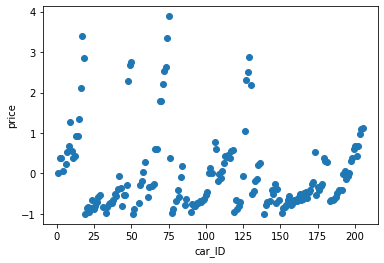

In [50]:
matplotlib.pyplot.xlabel('car_ID')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['car_ID'] , calc_df['price'])

<div style="direction:rtl"> ۲) به ازای carlength </div>

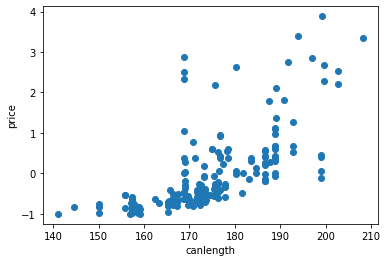

In [51]:
matplotlib.pyplot.xlabel('canlength')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['carlength'] , calc_df['price'])

<div style="direction:rtl"> ۳) به ازای carwidth
</div>

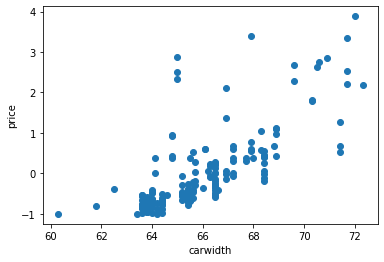

In [52]:
matplotlib.pyplot.xlabel('carwidth')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['carwidth'] , calc_df['price'])

<div style="direction:rtl"> ۴) به ازای carheight
</div>

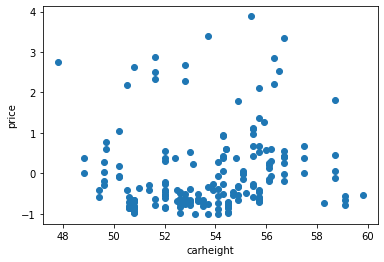

In [53]:
matplotlib.pyplot.xlabel('carheight')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['carheight'] , calc_df['price'])

<div style="direction:rtl"> ۵) به ازای curbweight
</div>

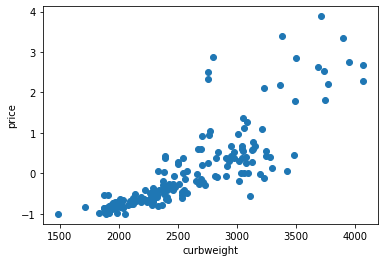

In [54]:
matplotlib.pyplot.xlabel('curbweight')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['curbweight'] , calc_df['price'])

<div style="direction:rtl"> ۶) به ازای enginesize
</div>

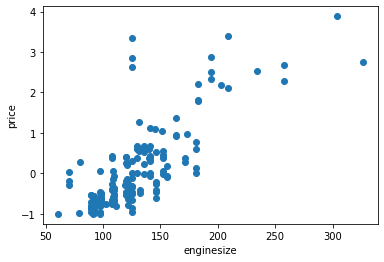

In [55]:
matplotlib.pyplot.xlabel('enginesize')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['enginesize'] , calc_df['price'])

<div style="direction:rtl"> ۷) به ازای horsepower
</div>

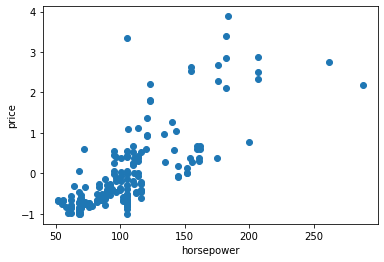

In [56]:
matplotlib.pyplot.xlabel('horsepower')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['horsepower'] , calc_df['price'])

<div style="direction:rtl"> ۸) به ازای citympg
</div>

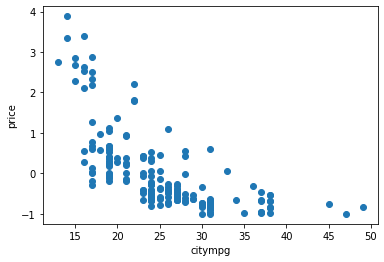

In [57]:
matplotlib.pyplot.xlabel('citympg')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['citympg'] , calc_df['price'])

<div style="direction:rtl"> ۹) به ازای highwaympg
</div>

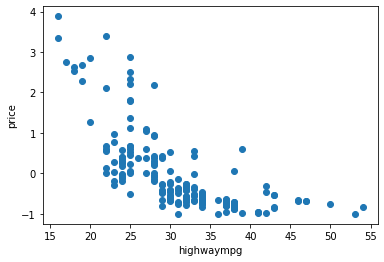

In [58]:
matplotlib.pyplot.xlabel('highwaympg')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['highwaympg'] , calc_df['price'])

<div style="direction:rtl"> ب) ویژگی اتنخاب شده : curbweight </div>

<div style="direction:rtl"> به این صورت این ویژگی را انتخاب می‌کنیم که ابتدا با استفاده از تابع corr، ماتریس correlation را به دست می‌آوریم. حال با توجه به این که در ستون مربوط به price، سطر curbweight بیش‌ترین مقدار را دارد، curbweight را انتخاب می‌کنیم. </div>

In [59]:
calc_df.corr()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
car_ID,1.000000,0.161679,0.057758,0.248575,0.062260,-0.008130,-0.038238,0.025332,0.024365,-0.125255
carlength,0.161679,1.000000,0.849517,0.497498,0.884480,0.640710,0.483501,-0.677509,-0.712908,0.683104
carwidth,0.057758,0.849517,1.000000,0.297065,0.868184,0.658163,0.572715,-0.647681,-0.682932,0.755490
carheight,0.248575,0.497498,0.297065,1.000000,0.309575,0.057823,-0.148700,-0.048037,-0.107775,0.111783
curbweight,0.062260,0.884480,0.868184,0.309575,1.000000,0.788655,0.682691,-0.754051,-0.793611,0.833602
enginesize,-0.008130,0.640710,0.658163,0.057823,0.788655,1.000000,0.756580,-0.606113,-0.619367,0.794026
horsepower,-0.038238,0.483501,0.572715,-0.148700,0.682691,0.756580,1.000000,-0.733795,-0.696293,0.769182
citympg,0.025332,-0.677509,-0.647681,-0.048037,-0.754051,-0.606113,-0.733795,1.000000,0.972525,-0.687151
highwaympg,0.024365,-0.712908,-0.682932,-0.107775,-0.793611,-0.619367,-0.696293,0.972525,1.000000,-0.698832
price,-0.125255,0.683104,0.755490,0.111783,0.833602,0.794026,0.769182,-0.687151,-0.698832,1.000000


<div style="direction:rtl"> ۱۱-
تشکیل دیتا فریم جدید بر اساس ویژگی انتخاب شده: </div>

In [60]:
final_df = calc_df[['curbweight' , 'price']]
final_df

,curbweight,price
0,2548,0.012484
1,2548,0.377353
2,2823,0.377353
3,2337,0.067731
5,2507,0.225577
...,...,...
200,2952,0.419243
201,3049,0.686368
202,3012,0.982634
203,3217,1.102234


<div style="direction:rtl"> ۱۲-
ابتدا ضرایب تابع تخمین‌گر را به روش normal equation به دست می‌آوریم و آن ها را در theta ذخیره می‌کنیم: </div>

<div style="direction:rtl"> *توضیحات مربوط به روش normal equation در این<a href="https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression"> لینک </a> موجود است.</div>
<br></br>
<div style="direction:rtl"> با توجه به روش normal equation می‌توان ضرایب را با رابطه زیر به دست آورد: </div>

$\theta = (X ^ {T} X) ^ {-1} . (X ^ {T} Y)$

In [61]:
import numpy
X = pandas.DataFrame()
X = X.assign(th0 = final_df['curbweight'] * 0 + 1 , th1 = final_df['curbweight'])
theta = (X.T).dot(X)
theta = pandas.DataFrame(numpy.linalg.pinv(theta.values), theta.columns, theta.index)
theta = theta.dot(X.T)
theta = theta.dot(final_df['price'])
theta

th0   -4.035820
th1    0.001578
dtype: float64

<div style="direction:rtl"> حال با استفاده از ضرایب به دست آمده ، مقدار price را به ازای ورودی ها (curbweight) به دست می‌آوریم. سپس مقدار خطا را با استفاده از فرمول داده شده برای تابع هزینه به دست می‌آوریم: </div>

In [62]:
evaluated_df = theta['th1'] * final_df['curbweight']
evaluated_df += theta['th0']

MSE = (final_df['price'] - evaluated_df) * (final_df['price'] - evaluated_df) / (final_df.shape[0])
MSE = MSE.sum()
print('MSE = ' + str(MSE))

MSE = 0.30345776161379706


<div style="direction:rtl"> ۱۳- نمودار تابع تخمین گر ( خط قرمز رنگ ) به همراه scatter plot ویژگی انتخاب شده ( curbweight ) :
</div>

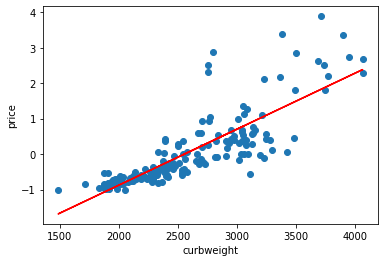

In [63]:
matplotlib.pyplot.xlabel('curbweight')
matplotlib.pyplot.ylabel('price')
matplotlib.pyplot.scatter(calc_df['curbweight'] , calc_df['price'])
matplotlib.pyplot.plot(calc_df['curbweight'] , evaluated_df , 'r')
matplotlib.pyplot.show()

<div style="direction:rtl"> خط قرمز نشان دهنده‌ی تخمین خطی ما از رابطه price با curbweight است. خط به دست آمده کمترین خطا را نسبت به سایر خط های ممکن دارد و معادله‌ی آن برابر است با:
</div>


$price = 0.001578 \times curbweight - 4.035820$ , $\theta _{0} = -4.035820$ , $\theta _{1} = 0.001578$

<div style="direction:rtl"> با اینکه این خط رابطه بین price و curbweight را دقیقا نشان نمی‌دهد اما یک تقریب خطی مناسب از آن را در اختیار ما می‌گذارد. </div>

<div style="direction:rtl"> ۱۴- تخمین قیمت در دیتا فریمی که در بخش ۳ جدا کرده بودیم:
</div>

In [64]:
new_df = new_df.assign(price = theta['th1'] * new_df['curbweight'] + theta['th0'])
new_df[['car_ID' , 'price']]

,car_ID,price
4,5,0.421088
29,30,0.400571
31,32,-1.165029
52,53,-1.029301
53,54,-0.966172
59,60,-0.271753
62,63,-0.232298
67,68,1.511641
78,79,-0.873057
84,85,0.582066
